**Objectives of the Capstone Project:**


*   Write code to visualize the impact and
analyze the trend of rate of infection and recovery
*   Make predictions
about the number of cases expected a week in future based on the current
trends



In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


Province/State does not seem to be providing much information. So dropping it

In [5]:
df.drop(['Province/State'],axis=1,inplace=True)
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Converting Date to datetime column

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

,0
Country/Region,object
Lat,float64
Long,float64
Date,datetime64[ns]
Confirmed,int64
Deaths,int64
Recovered,int64
Active,int64
WHO Region,object


In [7]:
df.isna().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


Renaming the columns to have same naming convention throughout the dataset

In [8]:
# rename columns
# Date: date, Province/State:state,Country/Region: country
df.rename(columns={'Date':'date',
                   'Country/Region': 'country',
                   'Lat':'lat',
                   'Long':'long',
                   'Confirmed':'confirmed',
                   'Deaths':'deaths',
                   'Recovered':'recovered',
                   'Active':'active',
                   'WHO Region':'WHO regions'
                   }, inplace=True)
df.head()

,country,lat,long,date,confirmed,deaths,recovered,active,WHO regions
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Visualizing the impact and
analyzing the trend of rate of infection and recovery *italicized text*

In [9]:
# the latest cases
# present date from dataset
# get the latest confirmed, death and recovered cases WRT countries


top= df[df['date']== df['date'].max()]
world=top.groupby('country')[['confirmed','recovered','deaths','active']].sum().reset_index()
world.head()

,country,confirmed,recovered,deaths,active
0,Afghanistan,36263,25198,1269,9796
1,Albania,4880,2745,144,1991
2,Algeria,27973,18837,1163,7973
3,Andorra,907,803,52,52
4,Angola,950,242,41,667


In [10]:
figure=px.choropleth(world,
                     locations='country',
                     locationmode='country names',
                     color='active',
                     hover_name='country',
                     range_color=(1,1000),
                     color_continuous_scale='magma',
                     title='Countries with active cases')
figure.show()

In [11]:
# determine total confirmed cases grouped by date
# plot it x=total cases y = dates
# with respect to date i want to see the todal cases/day

total_cases=df.groupby('date')[['confirmed']].sum().reset_index()
total_cases1=total_cases.head(50)

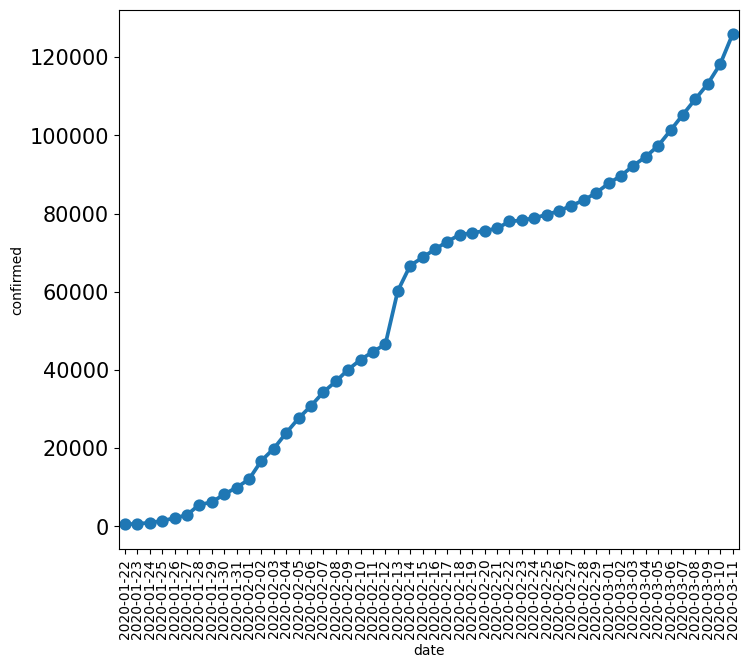

In [12]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
sns.pointplot(x=total_cases1.date.dt.date,y=total_cases1.confirmed)
plt.show()

In [13]:
# Active cases and death cases --> /day
df_active = df.groupby('date')[['deaths', 'active']].sum().reset_index()
df_active1=df_active.head(50)

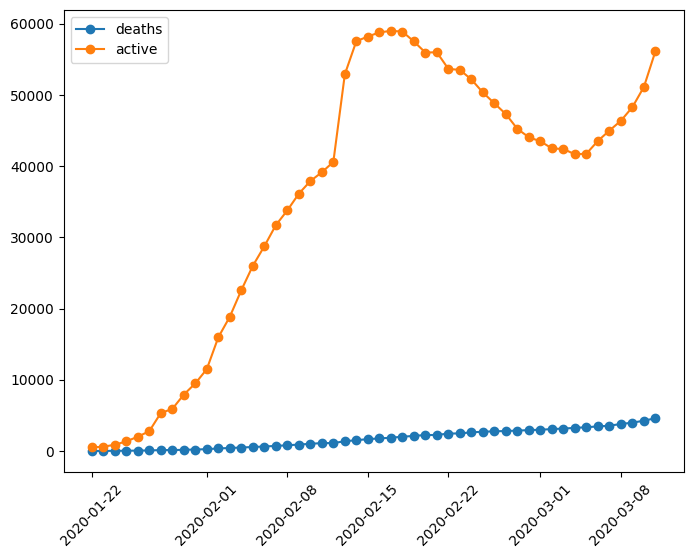

In [14]:
plt.subplots(figsize=(8,6))
plt.plot( df_active1['date'], df_active1['deaths'], label = 'deaths', marker = 'o', linewidth = 1.5)
plt.plot(df_active1['date'], df_active1['active'], label = 'active' , marker = 'o', linewidth = 1.5)

plt.xticks(rotation=45)

plt.legend()
plt.show()

In [15]:
# filter out a country
# to get all the confirmed, death and recovered cases of that country /day
india=df[df.country=='India']
india

,country,lat,long,date,confirmed,deaths,recovered,active,WHO regions
129,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...
47892,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [16]:
india=india.groupby(by='date')[['recovered','deaths','confirmed','active']].sum().reset_index()

In [17]:
india.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


<Axes: xlabel='date', ylabel='confirmed'>

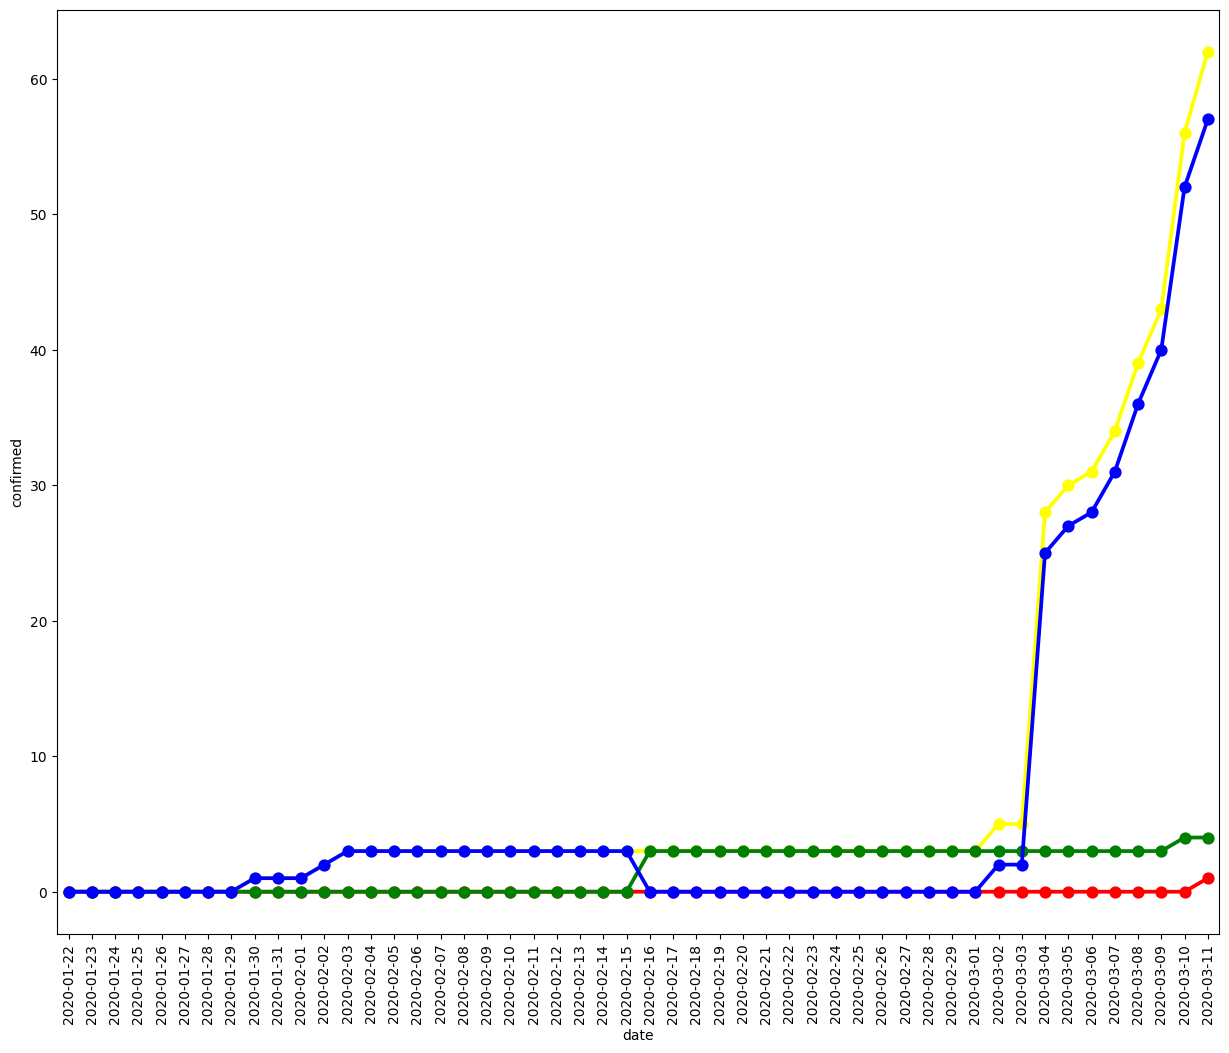

In [21]:
plt.figure(figsize=(15,12))
plt.xticks(rotation=90)
sns.pointplot(data=india.head(50), x="date",y="confirmed",color='yellow')
sns.pointplot(data=india.head(50), x="date",y="deaths",color='red')
sns.pointplot(data=india.head(50), x="date",y="recovered",color='green')
sns.pointplot(data=india.head(50), x="date",y="active",color='blue')

**Starting Objective 2 below:**


*Below is the link of docuentation on how to use Facebook Prophet model for forecasting*

https://facebook.github.io/prophet/docs/quick_start.html

In [25]:
#install fbprophet
!pip install prophet

In [29]:
#import facebook prophet model for time series
# check prophet version
from prophet import Prophet

In [30]:
df.head()

,country,lat,long,date,confirmed,deaths,recovered,active,WHO regions
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [47]:
trend = df[["date" , "confirmed"]]
trend.head()

,date,confirmed
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-22,0
4,2020-01-22,0


In [48]:
trend["date"] = pd.to_datetime(trend["date"])
trend.head()

,date,confirmed
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-22,0
4,2020-01-22,0


In [49]:
# order trend by data in ascending order
trend.sort_values(by='date', inplace=True)
trend.head()

,date,confirmed
0,2020-01-22,0
166,2020-01-22,0
167,2020-01-22,0
168,2020-01-22,0
169,2020-01-22,0


In [50]:
trend.reset_index(drop = True, inplace=True)
trend.head()

,date,confirmed
0,2020-01-22,0
1,2020-01-22,0
2,2020-01-22,0
3,2020-01-22,0
4,2020-01-22,0


In [63]:
trend_final = trend.groupby('date').sum().reset_index()
trend_final.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [64]:
trend_final.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


**The input to Prophet is always a dataframe with two columns: ds and y**.

In [65]:
trend_final.rename(columns = {"date":"ds" , "confirmed":"y"} , inplace=True)
trend_final.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [66]:
# Fitting a facebook prophet model for forecasting
m = Prophet()
m.fit(trend_final)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp19upd0qv/3tr8oruf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp19upd0qv/pu_bougm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84741', 'data', 'file=/tmp/tmp19upd0qv/3tr8oruf.json', 'init=/tmp/tmp19upd0qv/pu_bougm.json', 'output', 'file=/tmp/tmp19upd0qv/prophet_modelgxa1algm/prophet_model-20241207105401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:54:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


*Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made.*

In [67]:
future = m.make_future_dataframe(periods=7)
future


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


*The predict method will assign each row in future a predicted value which it names yhat.*

In [68]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]



,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.301886e+05,8.381171e+04
1,2020-01-23,-8.050948e+03,-1.091482e+05,9.533337e+04
2,2020-01-24,5.827455e+03,-1.002928e+05,1.081136e+05
3,2020-01-25,1.217668e+04,-9.498051e+04,1.082549e+05
4,2020-01-26,8.405020e+03,-9.034422e+04,1.093173e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.664025e+07,1.685288e+07
191,2020-07-31,1.695910e+07,1.685476e+07,1.706610e+07
192,2020-08-01,1.716676e+07,1.705628e+07,1.727801e+07
193,2020-08-02,1.736430e+07,1.725256e+07,1.748523e+07


In [72]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
188,2020-07-28,1.632020e+07,1.621395e+07,1.642942e+07
189,2020-07-29,1.652997e+07,1.642460e+07,1.663938e+07
190,2020-07-30,1.674391e+07,1.664025e+07,1.685288e+07
191,2020-07-31,1.695910e+07,1.685476e+07,1.706610e+07
192,2020-08-01,1.716676e+07,1.705628e+07,1.727801e+07
193,2020-08-02,1.736430e+07,1.725256e+07,1.748523e+07
194,2020-08-03,1.755889e+07,1.743960e+07,1.766750e+07


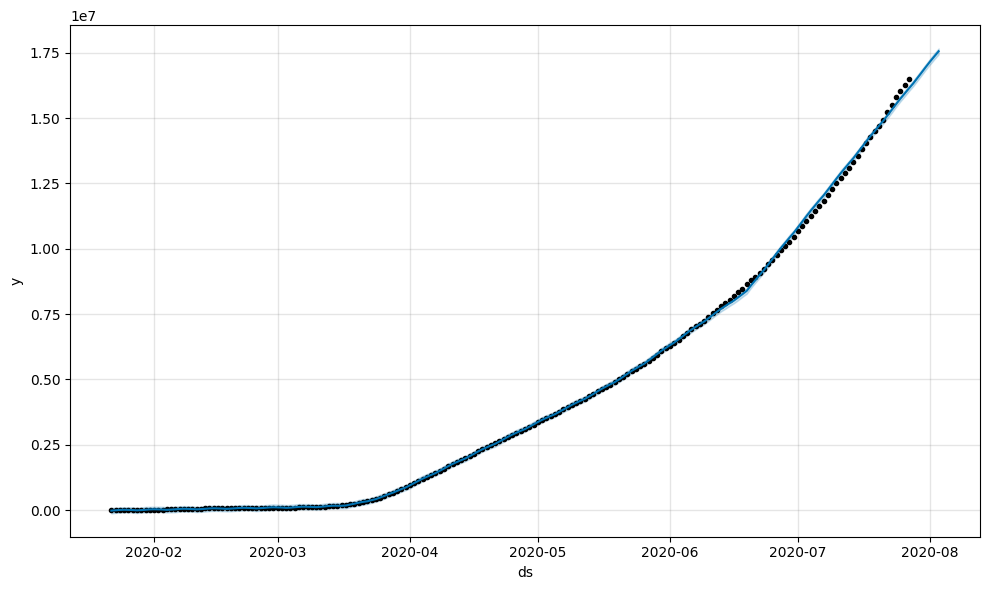

In [69]:
fig1 = m.plot(forecast)

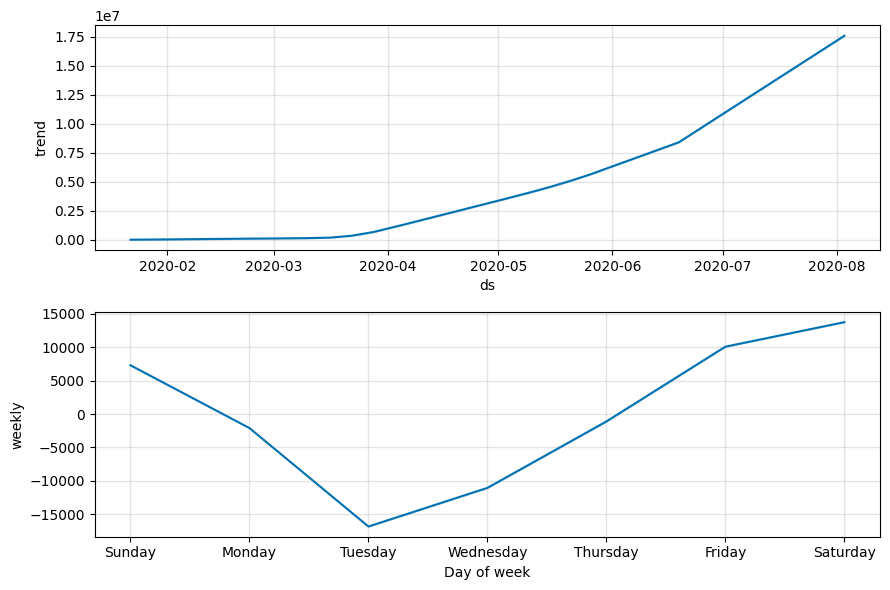

In [70]:
fig2 = m.plot_components(forecast)

**Below are the plots with Plotly for the facebook prophet model**

In [73]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [74]:
plot_components_plotly(m, forecast)